In [1]:
import glob
import copy
import itertools
import pandas as pd
import scipy.io as io
import os
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 32

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


%matplotlib inline

In [2]:
# make time data into Timestamp format
def try_totime(t):
    try:
        return pd.Timestamp(t)
    except:
        return np.nan

In [3]:
A = 50
dir0 = os.chdir('C:/Users/aBr/Desktop/work term/ONC/Codes/Strait of Georgia East - Hydrophone A')
cwd0= os.getcwd()
files_grabbed0 = glob.glob('*.mat')

curr0 = os.path.splitext(os.path.basename(cwd0))[0]

all_files_data = [] 


for file in files_grabbed0:

    contents_squeezed = io.loadmat(file, squeeze_me=True)
    
    start_date_and_end_date  = file.split('-')[0].split('_')[-2:]  
    df_temp = []   
    for item in contents_squeezed['SPDdata'].dtype.names:

        df_temp.append(pd.DataFrame({str(item) : [contents_squeezed['SPDdata'][item].item()]})) 

    data_frame = pd.concat(df_temp, axis=1)

    percentiles = pd.DataFrame(list(itertools.chain(*data_frame.percentiles)),columns=list(itertools.chain(*data_frame.percentLevels)))
  
    frequencies = pd.DataFrame(list(itertools.chain(*data_frame.frequencyBinCentres)),columns=['frequencyBinCentres'])

    df = copy.deepcopy(frequencies)
    df[['date_from','date_to']] = start_date_and_end_date 
    df['start'] = df.date_from.map(try_totime)
    df['end'] = df.date_to.map(try_totime)
    df['time'] = df.start + (df.end - df.start)/2

    df = df.merge(percentiles, left_index=True,right_index=True)

    all_files_data.append(df.loc[df.frequencyBinCentres>=A,:].iloc[0])

    df_all_files = pd.concat(all_files_data, axis=0,ignore_index=False)

df_all_files['time']=  pd.to_datetime(df_all_files['time'],utc=True)
df_all_files =df_all_files.rename({1: "p01", 5:"p05" ,50: "p50", 95: "p95", 99 : "p99"},copy = False)


In [4]:
dir1 = os.chdir('C:/Users/aBr/Desktop/work term/ONC/Codes/Strait of Georgia East - Hydrophone B')
cwd1= os.getcwd()
files_grabbed1 = glob.glob('*.mat')

curr1 = os.path.splitext(os.path.basename(cwd1))[0]

all_files_data = [] 


for file in files_grabbed1:

    contents_squeezed = io.loadmat(file, squeeze_me=True)
    
    start_date_and_end_date  = file.split('-')[0].split('_')[-2:]  
    df_temp = []   
    for item in contents_squeezed['SPDdata'].dtype.names:

        df_temp.append(pd.DataFrame({str(item) : [contents_squeezed['SPDdata'][item].item()]})) 

    data_frame = pd.concat(df_temp, axis=1)

    percentiles = pd.DataFrame(list(itertools.chain(*data_frame.percentiles)),columns=list(itertools.chain(*data_frame.percentLevels)))
  
    frequencies = pd.DataFrame(list(itertools.chain(*data_frame.frequencyBinCentres)),columns=['frequencyBinCentres'])

    df1 = copy.deepcopy(frequencies)
    df1[['date_from','date_to']] = start_date_and_end_date 
    df1['start'] = df1.date_from.map(try_totime)
    df1['end'] = df1.date_to.map(try_totime)
    df1['time'] = df1.start + (df1.end - df1.start)/2

    df1 = df1.merge(percentiles, left_index=True,right_index=True)

    all_files_data.append(df1.loc[df1.frequencyBinCentres>=A,:].iloc[0])

    df_all_files1 = pd.concat(all_files_data, axis=0,ignore_index=False)

df_all_files1['time']=  pd.to_datetime(df_all_files1['time'],utc=True)
df_all_files1 =df_all_files1.rename({1: "p01", 5:"p05" ,50: "p50", 95: "p95", 99 : "p99"},copy = False)


In [5]:
dir2 = os.chdir('C:/Users/aBr/Desktop/work term/ONC/Codes/Strait of Georgia East - Hydrophone C')
cwd2= os.getcwd()
files_grabbed2 = glob.glob('*.mat')

curr2 = os.path.splitext(os.path.basename(cwd2))[0]

all_files_data = [] 


for file in files_grabbed2:

    contents_squeezed = io.loadmat(file, squeeze_me=True)
    
    start_date_and_end_date  = file.split('-')[0].split('_')[-2:]  
    df_temp = []   
    for item in contents_squeezed['SPDdata'].dtype.names:

        df_temp.append(pd.DataFrame({str(item) : [contents_squeezed['SPDdata'][item].item()]})) 

    data_frame = pd.concat(df_temp, axis=1)

    percentiles = pd.DataFrame(list(itertools.chain(*data_frame.percentiles)),columns=list(itertools.chain(*data_frame.percentLevels)))
  
    frequencies = pd.DataFrame(list(itertools.chain(*data_frame.frequencyBinCentres)),columns=['frequencyBinCentres'])

    df2 = copy.deepcopy(frequencies)
    df2[['date_from','date_to']] = start_date_and_end_date 
    df2['start'] = df2.date_from.map(try_totime)
    df2['end'] = df2.date_to.map(try_totime)
    df2['time'] = df2.start + (df2.end - df2.start)/2

    df2 = df2.merge(percentiles, left_index=True,right_index=True)

    all_files_data.append(df2.loc[df2.frequencyBinCentres>=A,:].iloc[0])

    df_all_files2 = pd.concat(all_files_data, axis=0,ignore_index=False)

df_all_files2['time']=  pd.to_datetime(df_all_files2['time'],utc=True)
df_all_files2 =df_all_files2.rename({1: "p01", 5:"p05" ,50: "p50", 95: "p95", 99 : "p99"},copy = False)


In [6]:
dir3 = os.chdir('C:/Users/aBr/Desktop/work term/ONC/Codes/Strait of Georgia East  - Hydrophone D')
cwd3= os.getcwd()
files_grabbed3 = glob.glob('*.mat')

curr3 = os.path.splitext(os.path.basename(cwd3))[0]

all_files_data = [] 


for file in files_grabbed3:

    contents_squeezed = io.loadmat(file, squeeze_me=True)
    
    start_date_and_end_date  = file.split('-')[0].split('_')[-2:]  
    df_temp = []   
    for item in contents_squeezed['SPDdata'].dtype.names:

        df_temp.append(pd.DataFrame({str(item) : [contents_squeezed['SPDdata'][item].item()]})) 

    data_frame = pd.concat(df_temp, axis=1)

    percentiles = pd.DataFrame(list(itertools.chain(*data_frame.percentiles)),columns=list(itertools.chain(*data_frame.percentLevels)))
  
    frequencies = pd.DataFrame(list(itertools.chain(*data_frame.frequencyBinCentres)),columns=['frequencyBinCentres'])

    df3 = copy.deepcopy(frequencies)
    df3[['date_from','date_to']] = start_date_and_end_date 
    df3['start'] = df3.date_from.map(try_totime)
    df3['end'] = df3.date_to.map(try_totime)
    df3['time'] = df3.start + (df3.end - df3.start)/2

    df3 = df3.merge(percentiles, left_index=True,right_index=True)

    all_files_data.append(df3.loc[df3.frequencyBinCentres>=A,:].iloc[0])

    df_all_files3 = pd.concat(all_files_data, axis=0,ignore_index=False)

df_all_files3['time']=  pd.to_datetime(df_all_files3['time'],utc=True)
df_all_files3 =df_all_files3.rename({1: "p01", 5:"p05" ,50: "p50", 95: "p95", 99 : "p99"},copy = False)


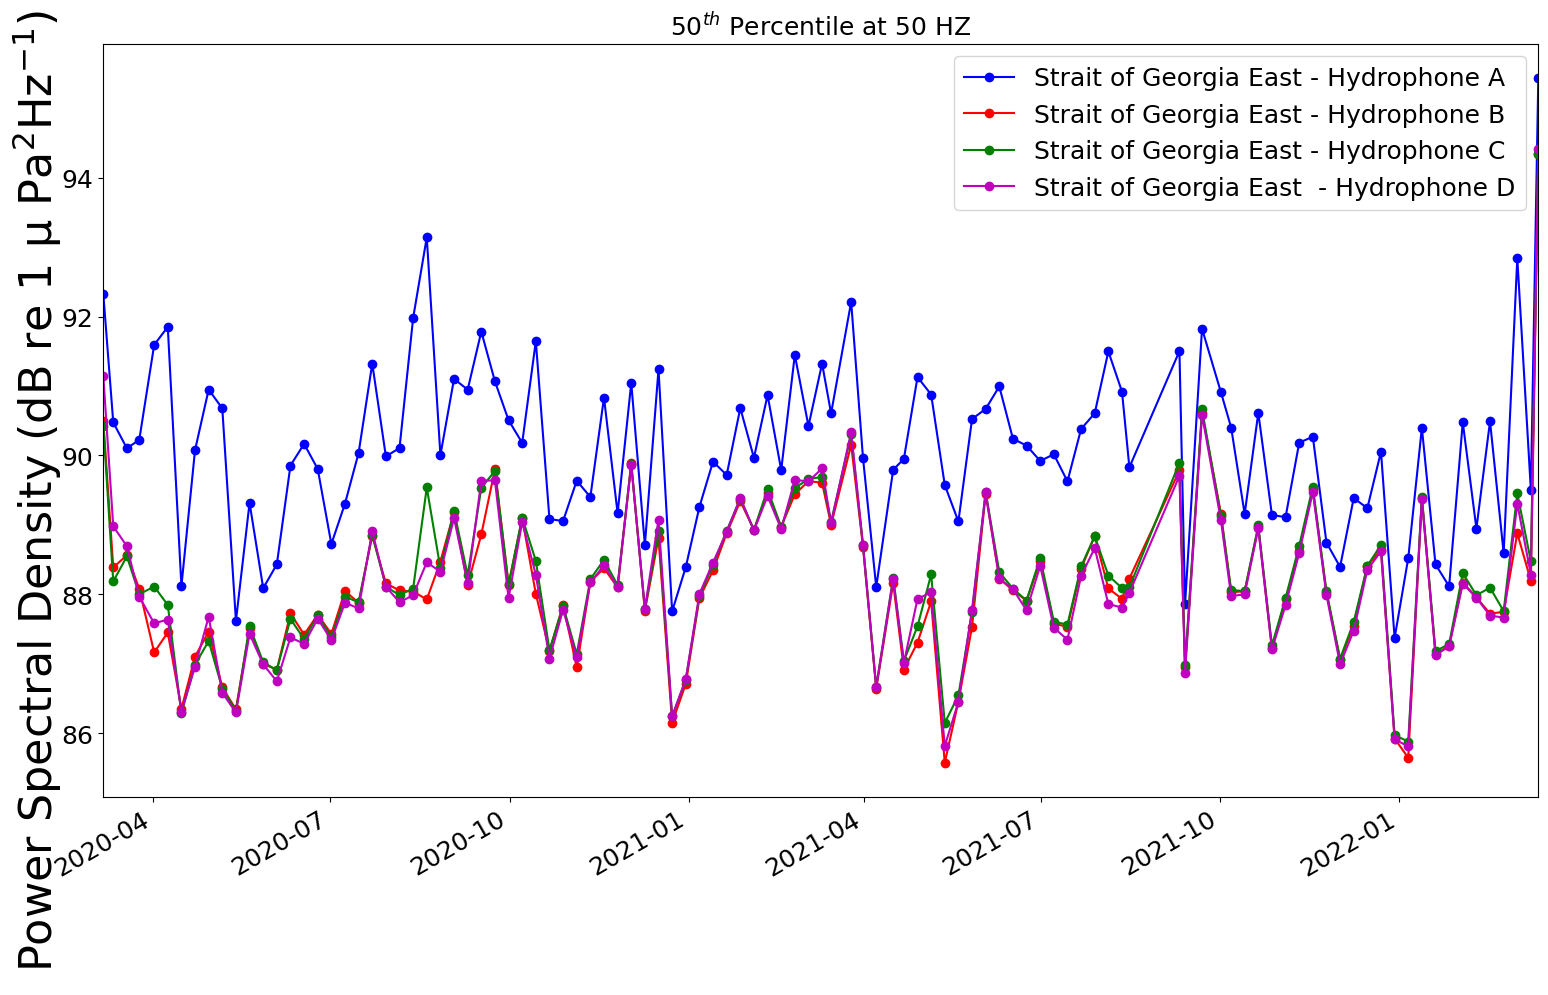

In [7]:

fig,ax =plt.subplots(1,figsize=(16,10), dpi= 100, facecolor='w', edgecolor='k')

#fig.suptitle(curr, fontsize=30)

ax.set_title("$50^{th}$ Percentile at 50 HZ")

ax.plot(df_all_files["time"], df_all_files["p50"],'b-o',label = curr0)
ax.plot(df_all_files1["time"], df_all_files1["p50"],'r-o',label = curr1)
ax.plot(df_all_files2["time"], df_all_files2["p50"],'g-o',label = curr2)
ax.plot(df_all_files3["time"], df_all_files3["p50"],'m-o',label = curr3)




ax.legend()

fig.supylabel(' Power Spectral Density (dB re $1$ \u03BC Pa$^2$Hz$^{-1}$)')
fig.tight_layout() 

plt.margins(x=0)
plt.gcf().autofmt_xdate()